In [1]:
import pandas as pd
import nltk
nltk.download('punkt')
import numpy as np

c:\Users\Str\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Str\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
test = pd.read_csv('test.csv', engine='python', error_bad_lines=False)

C:\Users\Str\AppData\Local\Temp\ipykernel_17480\1685042775.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test = pd.read_csv('test.csv', engine='python', error_bad_lines=False)


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [4]:
fake_words = ['disappointed', 'words', 'most']
true_words = ['taxes', 'president', 'analysts']

In [5]:
def get_true(text):
    
    words = nltk.word_tokenize(text.lower())

    num_fake = sum([1 for word in words if word in fake_words])
    num_true = sum([1 for word in words if word in true_words])

    if num_fake > num_true:
        return 'fake'
    else:
        return 'true'

In [6]:
train = pd.read_csv('train.csv', encoding='utf-8')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
subset = test.sample(frac=0.005)

In [9]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1681 to 198
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      26 non-null     int64 
 1   title   26 non-null     object
 2   author  25 non-null     object
 3   text    26 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [10]:
subset.to_csv('subset.csv', index=False)

# Work at LabelStudio

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split # Для разделения данных на обучающую и тестовую выборку
from sklearn.feature_extraction.text import TfidfVectorizer # для преобразования текста в вектор
from sklearn.linear_model import LogisticRegression # использование модели логистической регрессии
from sklearn.metrics import accuracy_score, classification_report # оценка производительности модели
from sklearn.pipeline import Pipeline # конвеер обработки данных
from sklearn.utils import shuffle
from sklearn.metrics import f1_score

In [12]:
train = pd.read_csv('train.csv', engine='python', error_bad_lines=False)
train.head()

C:\Users\Str\AppData\Local\Temp\ipykernel_17480\1113978163.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train = pd.read_csv('train.csv', engine='python', error_bad_lines=False)
Skipping line 13535: field larger than field limit (131072)
Skipping line 19783: field larger than field limit (131072)
Skipping line 13541: Expected 5 fields in line 13541, saw 6
Skipping line 19782: Expected 5 fields in line 19782, saw 7
Skipping line 19783: Expected 5 fields in line 19783, saw 10
Skipping line 19785: Expected 5 fields in line 19785, saw 14
Skipping line 19787: Expected 5 fields in line 19787, saw 8
Skipping line 19789: Expected 5 fields in line 19789, saw 7
Skipping line 19790: Expected 5 fields in line 19790, saw 15
Skipping line 19791: Expected 5 fields in line 19791, saw 9
Skipping line 19792: Expected 5 fields in line 19792, saw 9
Skipping line 19793: Expected 5 fields in line 19793, saw 

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20822 entries, 0 to 20821
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20822 non-null  object
 1   title   20257 non-null  object
 2   author  18847 non-null  object
 3   text    20763 non-null  object
 4   label   20800 non-null  object
dtypes: object(5)
memory usage: 813.5+ KB


<AxesSubplot:>

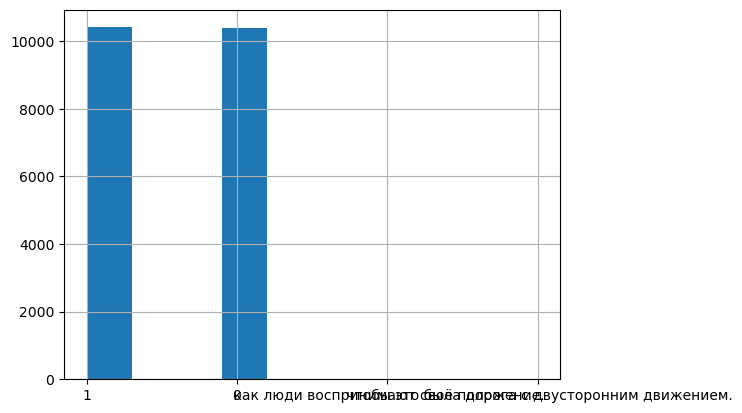

In [14]:
train['label'].hist()

In [15]:
# Перемешивание данных
train = shuffle(train)

In [16]:
# Разделение датасета на размеченную и неразмеченную выборки
labeled_news, unlabeled_news = train_test_split(train, train_size=0.005, random_state=42)

In [17]:
labeled_news

,id,title,author,text,label
10105,10105,"In Russian Doping Scandal, Time for a Punishme...",Michael Powell,You put the question to Sanya a gold medal r...,0
5876,5876,500 Migrants May Have Died in Sinking of Boat ...,Liz Alderman,The United Nations refugee agency said on Wedn...,0
13510,13510,Clinton Insider: Rigging Only Way Hillary Can Win,Jamie White,Clinton Insider: Rigging Only Way Hillary Can ...,1
15769,15754,Donald Trump: ’Anti-Semitism is Horrible’,Charlie Spiering,President Donald Trump condemned in response...,0
14549,14534,Time For the Real Left To Double Down on Singl...,Bruce A. Dixon,Tweet Widget A Black Agenda Radio Commentary b...,1
...,...,...,...,...,...
18616,18601,"After Eight Years in Guantánamo, He Yearns to ...",Carlotta Gall,TUNIS — Dressed in a thick jacket and wool ...,0
16890,16875,What Did Neanderthals Leave to Modern Humans? ...,Claudia Dreifus,Geneticists tell us that somewhere between 1 a...,0
17324,17309,How the Grammy Awards Are Made: 4 Craftsmen an...,Tamara Best,"Adele and Beyoncé, should you happen to read t...",0
18776,18761,Sean Spicer: No Evidence of Connection Between...,Kristina Wong,White House Press Secretary Sean Spicer ripped...,0


In [18]:
unlabeled_news

,id,title,author,text,label
6648,6648,Germany Clamping Down on Offshore Tax Havens,NaN,Germany Clamping Down on Offshore Tax Havens N...,1
5671,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
5010,5010,Jazz y Chistes: Toto Maigenys – I’ll Remember ...,Kike García,Jazz y Chistes #05: Muerte en otoño EL MUNDO T...,1
14966,14951,Theologarcy,Koyote,Notify me of follow-up comments by email. Noti...,1
15714,15699,Turkey Was an Unlikely Victim of an Equally Un...,Max Fisher and Amanda Taub,If the attempted coup in Turkey came as a surp...,0
...,...,...,...,...,...
17382,17367,"Man Killed by Tulsa Police Posed No Threat, Hi...",Timothy Williams and Manny Fernandez,"The family of Terence Crutcher, an unarmed bla...",0
15440,15425,DEAD MUSLIMS SOCIETY will sue to force small M...,BareNakedIslam,DEAD MUSLIMS SOCIETY will sue to force small M...,1
2191,2191,13 Herbal Teas With Highest Antioxidants,Twain Yobra,13 Herbal Teas With Highest Antioxidants http:...,1
13985,13970,The Race to Save the Films We Love - The New Y...,Manohla Dargis,If you have ever seen the 1931 film of “The Fr...,0


# Возьмем наш неразмеченный датасет test в качестве неразмеченных данных

In [19]:
unlabeled_news = test
unlabeled_news

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


In [20]:
labeled_news.head()

,id,title,author,text,label
10105,10105,"In Russian Doping Scandal, Time for a Punishme...",Michael Powell,You put the question to Sanya a gold medal r...,0
5876,5876,500 Migrants May Have Died in Sinking of Boat ...,Liz Alderman,The United Nations refugee agency said on Wedn...,0
13510,13510,Clinton Insider: Rigging Only Way Hillary Can Win,Jamie White,Clinton Insider: Rigging Only Way Hillary Can ...,1
15769,15754,Donald Trump: ’Anti-Semitism is Horrible’,Charlie Spiering,President Donald Trump condemned in response...,0
14549,14534,Time For the Real Left To Double Down on Singl...,Bruce A. Dixon,Tweet Widget A Black Agenda Radio Commentary b...,1


In [21]:
# Определение функции для обучения модели логистической регрессии на размеченных данных
def train_model(labeled_news):
    # Векторизация текстовых данных с помощью TF-IDF
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(labeled_news['text'])
    y = labeled_news['label']

    # Обучение модели логистической регрессии на размеченных данных
    model = LogisticRegression()
    model.fit(X, y)

    return model, vectorizer

In [22]:
labeled_news = labeled_news.dropna()
labeled_news

,id,title,author,text,label
10105,10105,"In Russian Doping Scandal, Time for a Punishme...",Michael Powell,You put the question to Sanya a gold medal r...,0
5876,5876,500 Migrants May Have Died in Sinking of Boat ...,Liz Alderman,The United Nations refugee agency said on Wedn...,0
13510,13510,Clinton Insider: Rigging Only Way Hillary Can Win,Jamie White,Clinton Insider: Rigging Only Way Hillary Can ...,1
15769,15754,Donald Trump: ’Anti-Semitism is Horrible’,Charlie Spiering,President Donald Trump condemned in response...,0
14549,14534,Time For the Real Left To Double Down on Singl...,Bruce A. Dixon,Tweet Widget A Black Agenda Radio Commentary b...,1
...,...,...,...,...,...
18616,18601,"After Eight Years in Guantánamo, He Yearns to ...",Carlotta Gall,TUNIS — Dressed in a thick jacket and wool ...,0
16890,16875,What Did Neanderthals Leave to Modern Humans? ...,Claudia Dreifus,Geneticists tell us that somewhere between 1 a...,0
17324,17309,How the Grammy Awards Are Made: 4 Craftsmen an...,Tamara Best,"Adele and Beyoncé, should you happen to read t...",0
18776,18761,Sean Spicer: No Evidence of Connection Between...,Kristina Wong,White House Press Secretary Sean Spicer ripped...,0


In [23]:
# Обучение начальной модели на небольшом наборе 
model, vectorizer = train_model(labeled_news)

In [24]:
unlabeled_news = unlabeled_news.dropna()
unlabeled_news

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
...,...,...,...,...
5194,25994,Trump on If ’Tapes’ Exist of Comey Conversatio...,Pam Key,Pres. Trump on if “tapes” exist of his convers...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...


In [25]:
# Использование исходной модели для прогнозирования настроения неразмеченных данных
X_unlabeled = vectorizer.transform(unlabeled_news['text'])
y_unlabeled_predicted = model.predict(X_unlabeled)

In [26]:
# Вычислить неопределенности или энтропии предсказаний
y_unlabeled_proba = model.predict_proba(X_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [27]:
# Выбор 26 наиболее неопределенных точек данных для маркировки человеком
labeled_news_new = unlabeled_news.iloc[uncertainty.argsort()[:26]]
unlabeled_news_new = unlabeled_news.iloc[uncertainty.argsort()[26:]]
labeled_news_new

,id,title,author,text
2630,23430,Florida Airport Assailant May Have Heard Voice...,"Lizette Alvarez, Richard Fausset and Adam Goldman","FORT LAUDERDALE, Fla. — Federal law enforce..."
2016,22816,Donald Trump in the White House: Will He Bring...,"Carl Hulse, Julie Hirschfeld Davis, Michael D....",Our coverage of the Trump transition continues...
4901,25701,"Paint and Switch? Did Alec Baldwin Pay $190,00...",Graham Bowley,"Ten years or so ago, as the actor Alec Baldwin..."
4704,25504,"For Andrew Puzder, Labor Nominee, Fighting for...",Russ Buettner and Noam Scheiber,Decades before President Trump nominated him t...
3237,24037,Ahmad Rahami: Fixture in Family’s Business and...,N. R. Kleinfield,He presided behind the counter of a storefront...
3551,24351,Devin Nunes Says He Will Continue to Lead Russ...,Emmarie Huetteman,WASHINGTON — The Republican chairman of the...
4542,25342,"Trump, Offering No Evidence, Says Obama Tapped...",Michael D. Shear and Michael S. Schmidt,"WEST PALM BEACH, Fla. — President Trump on ..."
359,21159,Social Circles Collide on a Dance Floor. Then ...,"Benjamin Mueller, Ashley Southall and Al Baker","Someone cut the music, and then from the kitch..."
1588,22388,House Democrats Ask Devin Nunes to Recuse Hims...,Matthew Rosenberg and Emmarie Huetteman,WASHINGTON — Top House Democrats on Monday ...
1012,21812,Meet the New Owner of the Playboy Mansion - Th...,Brooks Barnes,"LOS ANGELES — Last month, when the of ..."


# мы воспользуемся размеченным нами вручную в Label Studio датасетом 

In [28]:
unlabeled_news_new = test.head(250) ###pd.read_csv('project-1-at-2024-04-08-19-34-5b71b06a.csv', encoding='utf-8')
unlabeled_news_new = labeled_news_new.dropna()
labeled_news_new = train.head(26)
labeled_news_new = labeled_news_new.dropna()
labeled_news_new

,id,title,author,text,label
15331,15316,30-Year Sentence for Man Who Burned Florida Mo...,Kimiko de Freytas-Tamura,A Florida man who admitted that he had burned...,0
17328,17313,World War 3? Barack Obama Could Take A Major S...,Pakalert,Fatal error : Out of memory (allocated 1808793...,1
16956,16941,Victims of New Year’s Eve Migrant Attacks Come...,Donna Rachel Edmunds,"Allegations of sexual harassment, theft, and a...",0
3962,3962,Watch Ozzy Man’s incredibly sweary review of t...,OK,Next Swipe left/right Watch Ozzy Man’s incredi...,1
1608,1608,"Clinton Camp Desperate, Russia Trains for WWIII",Infowars Nightly News,"Clinton Camp Desperate, Russia Trains for WWII...",1
16443,16428,14 Days and Counting-There Will Be a Civil War...,Dave Hodges,Previous 14 Days and Counting-There Will Be a ...,1
5575,5575,How to Get the Most out of Visiting World-Famo...,Seth Kugel,"If you’re visiting Florence, Italy, you’ve got...",0
4070,4070,Legend Says This Will Translate Into A $100 Sp...,King World News,"16 Views October 27, 2016 GOLD , KWN King Worl...",1
18546,18531,Secret Israeli Operation Brings Tons Of Winter...,Deborah Danan,TEL AVIV — A clandestine Israeli initiative...,0
16847,16832,Das Solowki-Archipel: Wo das Paradies auf die ...,Julia Shevelkina,26. Oktober 2016 Julia Shevelkina Russia Beyon...,1


In [29]:
# Разметка новых точек данных и добавление их к размеченному множеству
labeled_news = pd.concat([labeled_news, labeled_news_new])
labeled_news = labeled_news.dropna()
labeled_news

,id,title,author,text,label
10105,10105,"In Russian Doping Scandal, Time for a Punishme...",Michael Powell,You put the question to Sanya a gold medal r...,0
5876,5876,500 Migrants May Have Died in Sinking of Boat ...,Liz Alderman,The United Nations refugee agency said on Wedn...,0
13510,13510,Clinton Insider: Rigging Only Way Hillary Can Win,Jamie White,Clinton Insider: Rigging Only Way Hillary Can ...,1
15769,15754,Donald Trump: ’Anti-Semitism is Horrible’,Charlie Spiering,President Donald Trump condemned in response...,0
14549,14534,Time For the Real Left To Double Down on Singl...,Bruce A. Dixon,Tweet Widget A Black Agenda Radio Commentary b...,1
...,...,...,...,...,...
17359,17344,Voting Machines Stolen Before Georgia Special ...,Warner Todd Huston,Several voting machines were stolen in Georgia...,0
19811,19789,"In the Turmoil Over Race and Policing, Childre...",Yamiche Alcindor,"In the past week alone, there was the girl ...",0
2797,2797,"Russia, Suspected in Hacking, Has Uneasy Histo...",Mark Landler,PHILADELPHIA — Follow along with our covera...,0
16951,16936,Why Your Backyard Chickens Could be Giving You...,Pamela Bofferding,The concept of owning backyard homesteading ha...,1


In [30]:
# Переобучение модели на расширенном маркированном множестве
model, vectorizer = train_model(labeled_news)

# Возникли проблемы, связанные с проникновением выбросов, поэтому оставил в следующей таблице 17000 из 20000 строк, потери не критичные

In [44]:
news_test = pd.read_csv('train.csv', engine='python', error_bad_lines=False)
news_test = news_test.dropna()
news_test = news_test.head(17000)
news_test.head(50)

C:\Users\Str\AppData\Local\Temp\ipykernel_17480\1709245581.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  news_test = pd.read_csv('train.csv', engine='python', error_bad_lines=False)
Skipping line 13535: field larger than field limit (131072)
Skipping line 19783: field larger than field limit (131072)
Skipping line 13541: Expected 5 fields in line 13541, saw 6
Skipping line 19782: Expected 5 fields in line 19782, saw 7
Skipping line 19783: Expected 5 fields in line 19783, saw 10
Skipping line 19785: Expected 5 fields in line 19785, saw 14
Skipping line 19787: Expected 5 fields in line 19787, saw 8
Skipping line 19789: Expected 5 fields in line 19789, saw 7
Skipping line 19790: Expected 5 fields in line 19790, saw 15
Skipping line 19791: Expected 5 fields in line 19791, saw 9
Skipping line 19792: Expected 5 fields in line 19792, saw 9
Skipping line 19793: Expected 5 fields in line 19793, 

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [46]:
news_test['label'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0    9653
1    7347
Name: label, dtype: int64>

# Со следующей ошибкой так и не разобрался, извините...

In [47]:
# Оценка модели на тестовом датасете
X_test = vectorizer.transform(news_test['text'])
y_test_predicted = model.predict(X_test)
f1 = f1_score(news_test['label'], y_test_predicted)

print(f1)

ValueError: pos_label=1 is not a valid label. It should be one of ['0', '1']